In [1]:
import qiskit
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
import numpy as np
import math
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi
shots = 256

Question 1 -(a)

In [3]:
from numpy.random import randint
np.random.seed(seed=0) # You may choose any seed instead of just `0' 
n = 4 # This is the number of bits in the string
alice_bits = randint(2, size=n)
print(alice_bits)

[0 1 1 0]


In [4]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
circuit = QuantumCircuit(q,c)

circuit.h(q[1])
circuit.cx(q[1],q[0])
if alice_bits[0]:
    circuit.x(q[0])
    
elif alice_bits[1]:
    circuit.z(q[0])

circuit.i(q[0])
circuit.cx(q[0],q[1])
circuit.h(q[0])
circuit.h(q[3])
circuit.cx(q[3],q[2])

if alice_bits[3]:
    circuit.z(q[2])
    
elif alice_bits[2]:
    circuit.x(q[2])

circuit.i(q[2])

circuit.cx(q[2],q[3])
circuit.h(q[2])

circuit.measure(q,c)
circuit.draw()

┌───┐┌───┐┌───┐     ┌───┐   ┌─┐   
q0_0: ─────┤ X ├┤ Z ├┤ I ├──■──┤ H ├───┤M├───
      ┌───┐└─┬─┘└───┘└───┘┌─┴─┐└───┘┌─┐└╥┘   
q0_1: ┤ H ├──■────────────┤ X ├─────┤M├─╫────
      └───┘┌───┐┌───┐┌───┐└───┘┌───┐└╥┘ ║ ┌─┐
q0_2: ─────┤ X ├┤ X ├┤ I ├──■──┤ H ├─╫──╫─┤M├
      ┌───┐└─┬─┘└───┘└───┘┌─┴─┐└┬─┬┘ ║  ║ └╥┘
q0_3: ┤ H ├──■────────────┤ X ├─┤M├──╫──╫──╫─
      └───┘               └───┘ └╥┘  ║  ║  ║ 
c0: 4/═══════════════════════════╩═══╩══╩══╩═
                                 3   1  0  2

{'1001': 1024}


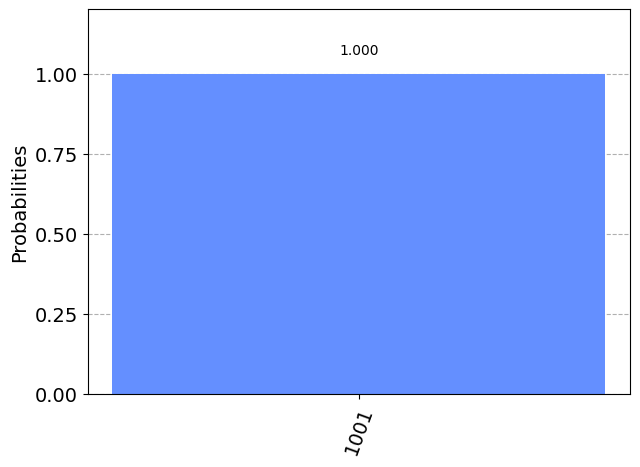

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Question 1 - (b)


In [43]:
from numpy.random import randint
# Setting the random seed
np.random.seed(seed=0) # You may choose any seed instead of just `0'
n = 4 # This is the number of bits in the string
alice_bits = randint(2, size=n)
simulator = Aer.get_backend('qasm_simulator')
print(alice_bits)

[0 1 1 0]


In [44]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit2 = QuantumCircuit(q,c)
circuit.initialize
circuit2.initialize

<bound method initialize of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fa7eabd5e80>>

In [45]:
circuit.h(q[1])
circuit.cx(q[1], q[0])
if alice_bits[1]:
    circuit.z(q[0])
elif alice_bits[0]:
    circuit.x(q[0])
circuit.cx(q[0], q[1])
circuit.h(q[0])
circuit.measure(q, c)
circuit.draw()

┌───┐┌───┐     ┌───┐┌─┐
q75_0: ─────┤ X ├┤ Z ├──■──┤ H ├┤M├
       ┌───┐└─┬─┘└───┘┌─┴─┐└┬─┬┘└╥┘
q75_1: ┤ H ├──■───────┤ X ├─┤M├──╫─
       └───┘          └───┘ └╥┘  ║ 
c11: 2/══════════════════════╩═══╩═
                             1   0

In [46]:
circuit2.h(q[1])
circuit2.cx(q[1], q[0])
if alice_bits[1]:
    circuit2.z(q[0])
elif alice_bits[0]:
    circuit2.x(q[0])
circuit2.cx(q[0], q[1])
circuit2.h(q[0])
circuit2.measure(q, c)
circuit2.draw()

┌───┐┌───┐     ┌───┐┌─┐
q75_0: ─────┤ X ├┤ Z ├──■──┤ H ├┤M├
       ┌───┐└─┬─┘└───┘┌─┴─┐└┬─┬┘└╥┘
q75_1: ┤ H ├──■───────┤ X ├─┤M├──╫─
       └───┘          └───┘ └╥┘  ║ 
c11: 2/══════════════════════╩═══╩═
                             1   0

{'01': 1024}


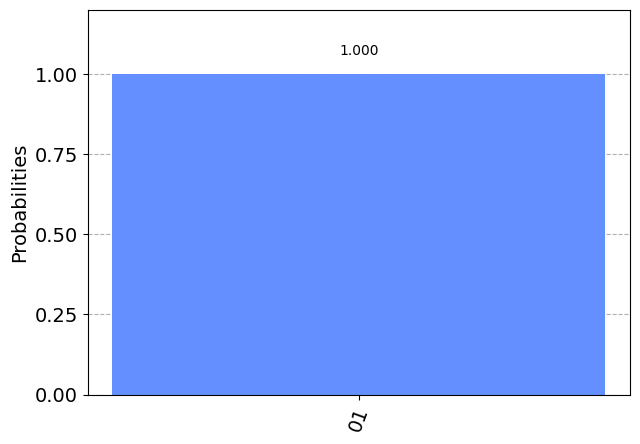

In [47]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

{'01': 1024}


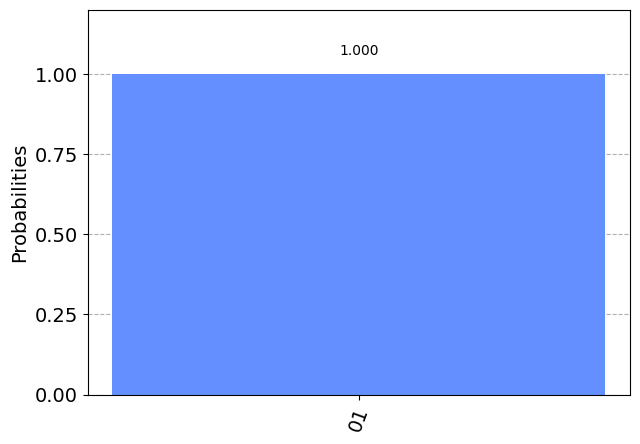

In [48]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit2, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [49]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256
# Load local account information
api_token = "b9a340c91ff05ac9f5cc36eb235cf52f9a5acf42339f8f3e70fa92e35848927ea8765aa1815c15126fbbe2340d68a272953299fdfe59899a2e27913ae7685e4d"
IBMQ.save_account(api_token)
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x:
x.configuration().n_qubits >= 2
and not x.configuration().simulator
and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
job1 = execute(circuit, backend=backend, shots=shots)



configrc.store_credentials:WARNING:2022-10-05 13:44:19,579: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-10-05 13:44:20,443: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_manila


In [51]:
from qiskit.tools.monitor import job_monitor
job_monitor(job1)


Job Status: job has successfully run


{'00': 11, '01': 239, '10': 4, '11': 2}


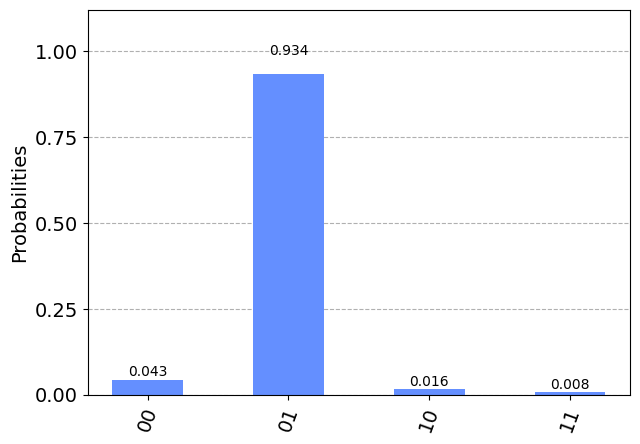

In [52]:
result = job1.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [53]:
job2 = execute(circuit2, backend=backend, shots=shots)
job_monitor(job2)

Job Status: job has successfully run


{'00': 14, '01': 235, '10': 2, '11': 5}


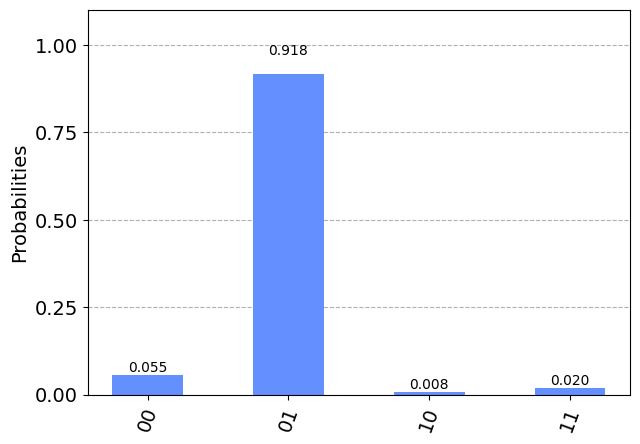

In [54]:
result = job2.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Question2
